In [1]:
import setup

In [2]:
import importlib
importlib.reload(setup)

<module 'setup' from '/home/guillermo/Nextcloud/projects/Distributed_Q_gates_clean/Codes/setup.py'>

In [5]:
import numpy as np
import os.path
from numpy import pi, floor, sqrt
import scipy.sparse as sp
import scipy.sparse.linalg
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from joblib import delayed, Parallel, parallel_backend
from math import pi as π

In [6]:
styles = ['science']
prefix = '../stylelib/'
sufix = '.mplstyle'
for i in range(len(styles)):
    styles[i] = prefix + styles[i] + sufix
plt.style.use(styles)
plt.rcParams.update({'font.size': 20})

In [7]:
def flat_photon_scattering(ω1=2*π*8.406, ω2=2*π*8.406, κ2=0.0540353936, l=5, mmax=105):
    
    control = setup.Exp2QB2Cavities(ω1=2*π*8.406, ω2=2*π*8.406, δ2=0, g2=0, κ1=0, κ2=κ2, l=l, mmax=mmax)
    
#     A = setup.evolve_time_dependent(setup.qubit_control_symm(a, setup.control_constant, tmax = 0), 
#     setup.step_photon(mmax), t=2*a.tprop, nsteps=np.int(2*a.tprop))

    duration = 2*control.tprop
    
    v0 = setup.step_photon(mmax)
    
    vt2 = scipy.sparse.linalg.expm_multiply(-1j * duration * control.Hamiltonian(), v0)  
    
    phases = np.angle(setup.step_photon(mmax)[4:]*vt2[4:]*np.exp(1j * control.ωrelevant * duration))/π
    
    return control.ωrelevant, phases, control.κ2*1e-9, control.ω2

In [8]:
scattering_5m = flat_photon_scattering(l=5, κ2=2*π*80*1e-3 )
scattering_15m = flat_photon_scattering(l=15, κ2=2*π*25*1e-3 )
scattering_30m = flat_photon_scattering(l=30, κ2=2*π*20*1e-3 )

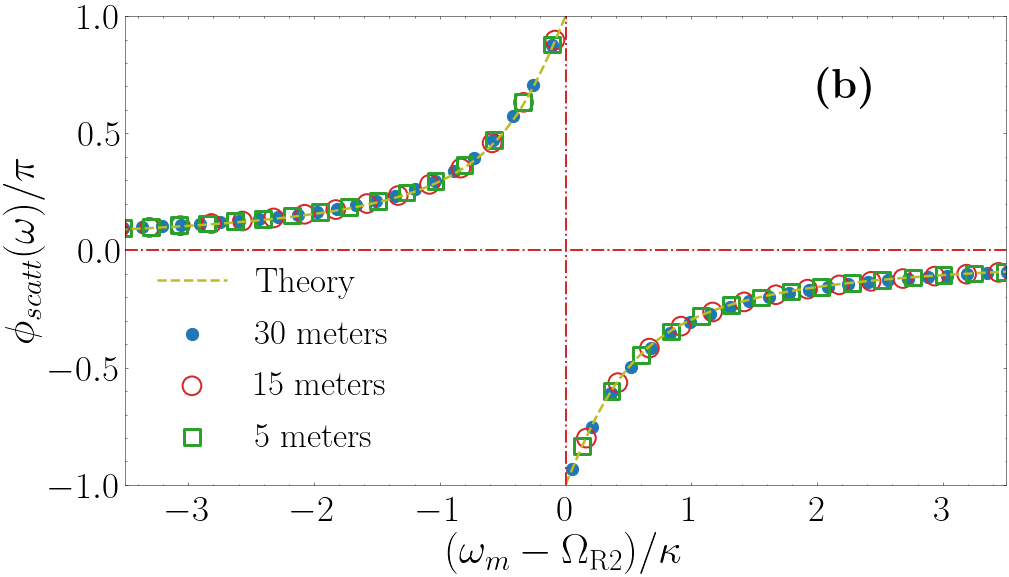

FileNotFoundError: [Errno 2] No such file or directory: '../Newfigures/fig4b.svg'

In [11]:
grid = {'hspace': 0.8, 'wspace': 0.5}
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(14, 8), constrained_layout=True)
plt.rcParams.update({'font.size': 35})

ax1.scatter((scattering_30m[0]-scattering_30m[3])/scattering_30m[2], scattering_30m[1], s=150, color = 'tab:blue', label='30 meters')
ax1.scatter((scattering_15m[0]-scattering_15m[3])/scattering_15m[2], scattering_15m[1], s=350, facecolors='none', edgecolors='tab:red', linewidth=2, label='15 meters')
ax1.scatter((scattering_5m[0]-scattering_5m[3])/scattering_5m[2], scattering_5m[1], s=250, marker='s', facecolors='none', edgecolors='tab:green', linewidth=3, label='5 meters')

xlistm=np.linspace(-10,-0.001,1000)
phi_theom=np.real(-1j*np.log(((1j*(xlistm)+(0.5)))/(1j*(xlistm)-(0.5)))/pi)
xlistp=np.linspace(0.001,10,1000)
phi_theop=np.real(-1j*np.log(((1j*(xlistp)+(0.5)))/(1j*(xlistp)-(0.5)))/pi)

ax1.plot(xlistm,phi_theom,'--', color = 'tab:olive', linewidth=2.5, label='Theory')
ax1.plot(xlistp,phi_theop,'--', color = 'tab:olive', linewidth=2.5)

ax1.set_ylabel('$\\phi_{\\text{scatt}}(\\omega)/\\pi $ ', {'fontsize': 42})
ax1.set_xlabel('$(\\omega_m-\\Omega_{\\text{R2}})/\\kappa$',  {'fontsize': 42})



ax1.set_ylabel('$\\phi_{scatt}(\\omega)/\\pi $ ', {'fontsize': 42})

ax1.text(2, 0.65,'\\textbf{(b)}',color='black', weight='bold', fontsize=42)
# ax1.text(8.422, 0.4,'$\\Omega_{\\text{R2}} = 8.406(2\\pi\\mathrm{GHz})$',color='black', fontsize=35)


ax1.legend(loc='lower left')
ax1.yaxis.set_tick_params(labelsize=37)
ax1.xaxis.set_tick_params(labelsize=37)
ax1.xaxis.set_tick_params(pad=10)
ax1.set_ylim(-1,1)
ax1.set_xlim(-3.5,3.5)
ax1.axhline(y = 0, color = 'tab:red', linestyle='-.', linewidth = 2)
ax1.axvline(x = 0, color = 'tab:red', linestyle='-.', linewidth = 2)


plt.show()
fig.savefig('../Newfigures/fig4b.svg')
fig.savefig('../Newfigures/fig4b.pdf')